# TP SEMANAL N°4 bis
### Juan Ignacio Jimenez Copati

## *Cálculos*

In [1]:
from IPython.display import IFrame
IFrame("./tp4bis.pdf", width=960, height=1000)

 ## *Simulación numérica*

In [2]:
#%% Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction     #de el scipy solo exporto la funcion transferfunction
from scipy import signal as sig  
import matplotlib.pyplot as plt               #le doy un nombre (plt) al matplotlib para usarlo más comodamente
import numpy as np                            #le doy un nombre (np) al numpy para usarlo más comodamente
import math as m

##### Librería de TC2
from pytc2.general import print_latex, print_subtitle
import pytc2.sistemas_lineales as tc2 #libreria de la catedra.
#Defino mi plantilla

alp_MAX=3      #dB
alp_min=20      #dB

wc1=0.8
wcs=1.25
ws1=0.625
ws2=1.6
w0=1

Q_bp=1/(1.25-0.8)
#Empiezo desde la definición de mis frecuencias de pasa bajo prototipo
wp_pb=1             # wp/wp
ws_pb= Q_bp * (ws2**2-1)/ws2

#Se calculan epsilon y n 

eps = m.sqrt( 10**(alp_MAX/10) - 1 )
[n,w0] = sig.buttord(wp_pb, ws_pb, alp_MAX, alp_min, True)

print("N=",n)
print("Epsilon=",eps)
#%%
print_subtitle('TRANSFERENCIA PASA BAJOS')

num_lp ,den_lp = sig.butter(n, w0, 'low', True)
sos_lp = tc2.tf2sos_analog(num_lp, den_lp)
tc2.pretty_print_SOS(sos_lp)

print_subtitle('TRANSFERENCIA PASA BANDA')
num_bp, den_bp=sig.lp2bp(num_lp, den_lp, bw = 1/Q_bp)
sos_pbanda = tc2.tf2sos_analog(num_bp, den_bp)
tc2.pretty_print_SOS(sos_pbanda)

N= 3
Epsilon= 0.9976283451109834


#### TRANSFERENCIA PASA BAJOS

<IPython.core.display.Math object>

#### TRANSFERENCIA PASA BANDA

<IPython.core.display.Math object>

Una observación de estas transferencias es que reparte la ganancia del numerador sobre las 3 transferencias. En el desarrollo que hice en papel, planteo que cada SOS tiene un coeficiente de 0,45, acompañando a la $ en el numerador, multiplicado por la ganancia de cada etapa.

In [3]:
#Para graficos

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
mpl.rcParams.update({'font.size':fig_font_size})

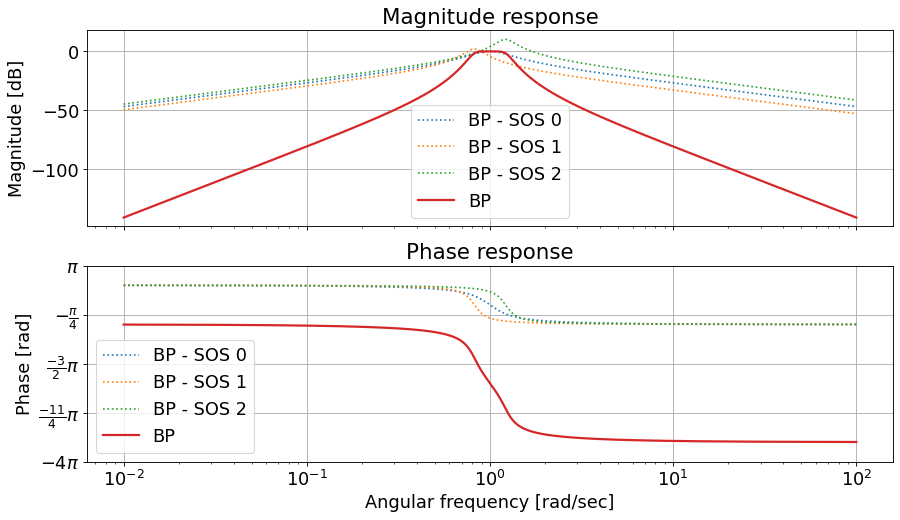

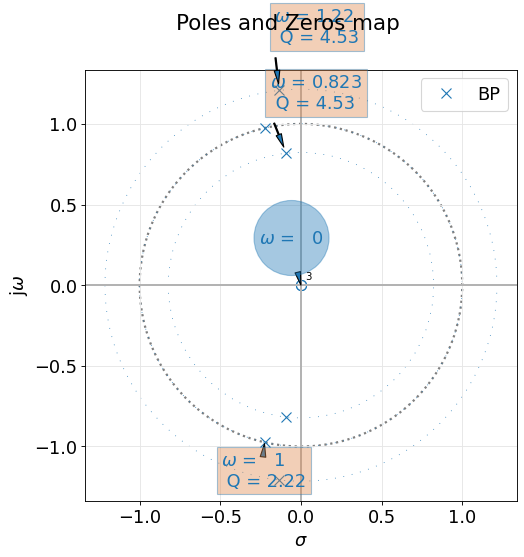

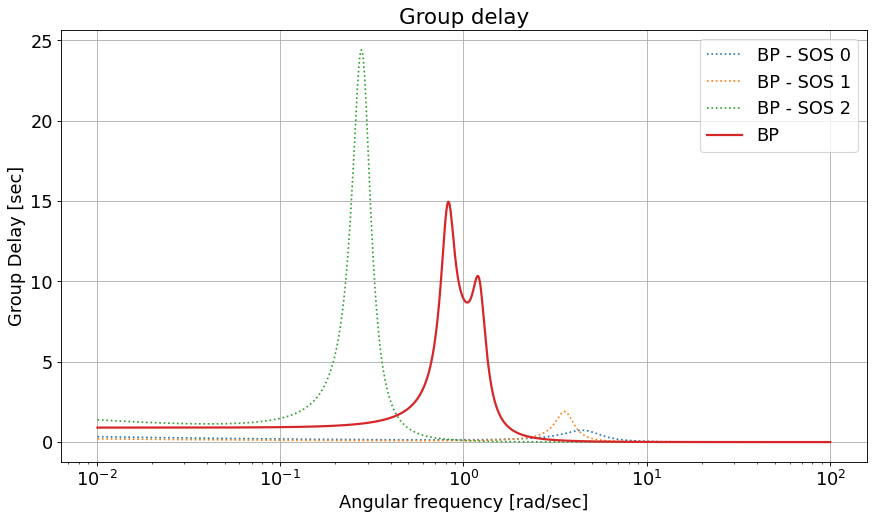

In [4]:
tc2.analyze_sys(sos_pbanda, sys_name="BP") 

Puede verificarse que los gráficos de módulo, fase y diagrama de polos y ceros coinciden con lo calculado. Además se pueden observar los gráficos individuales de cada SOS y los retardos de grupo, que no se calcularon.

 ## *Simulación circuital*


 ### Circuito de análisis

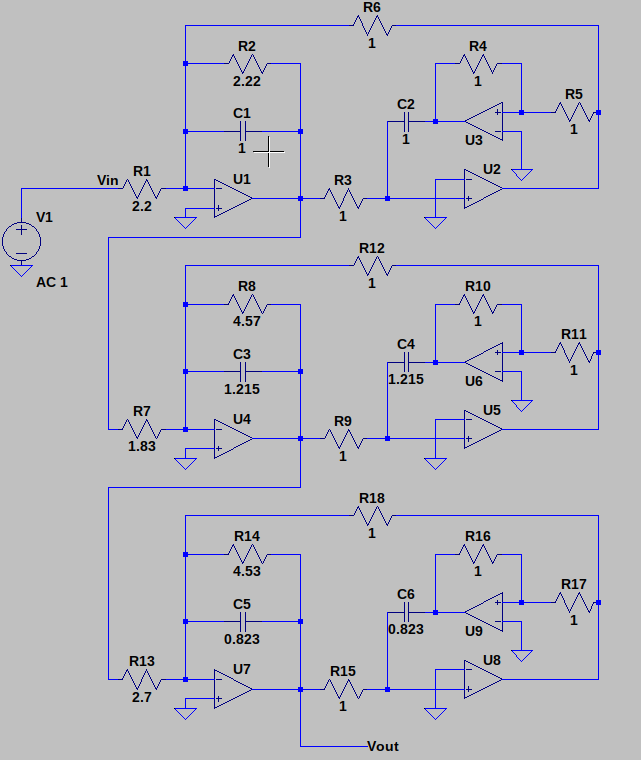

 ### Cursores en banda de paso

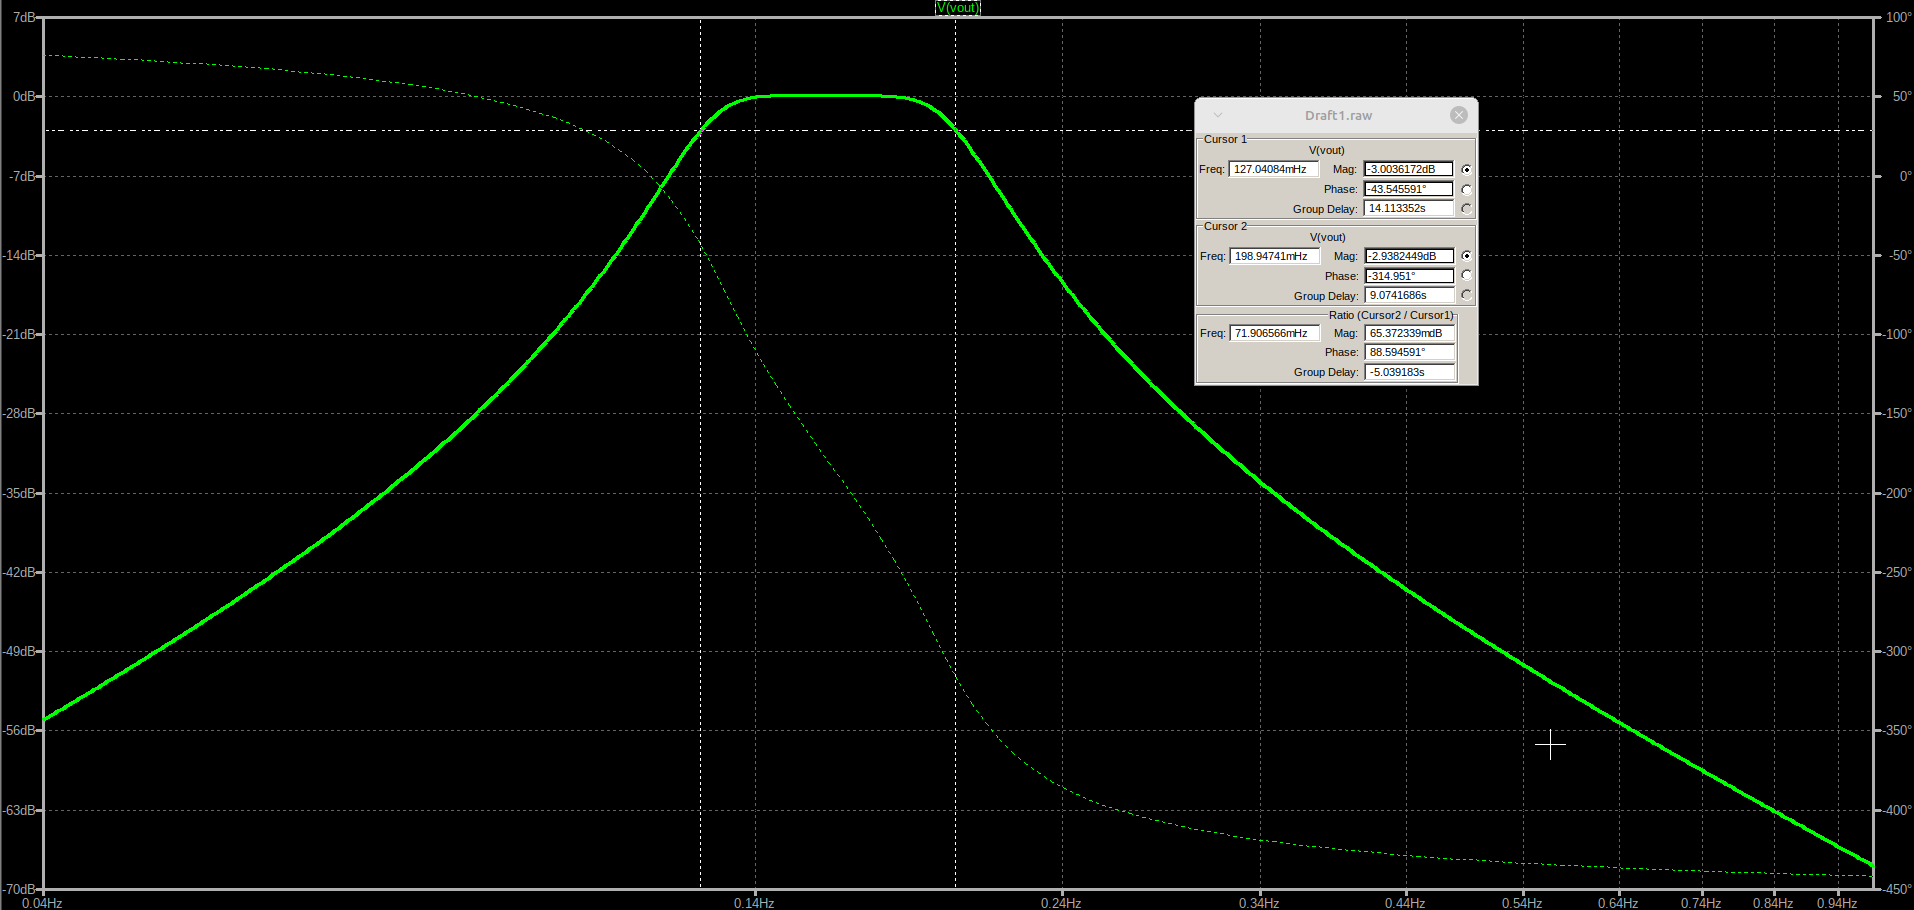

 ### Cursores en banda de stop

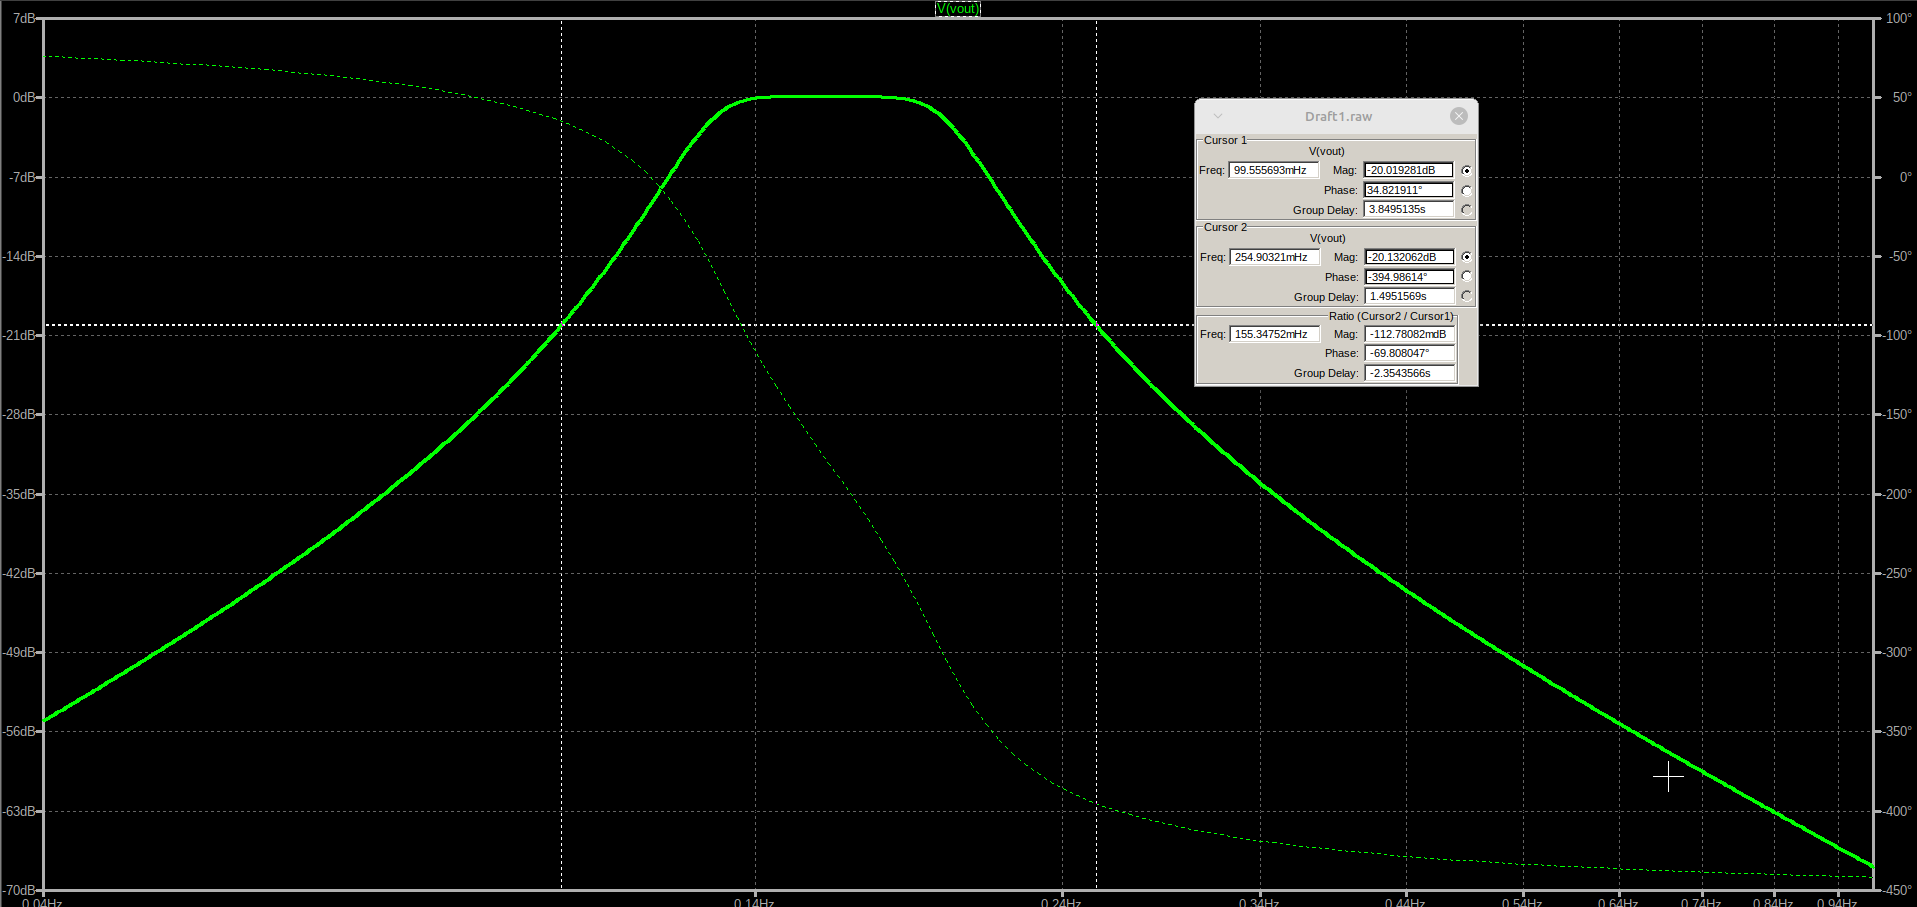

La simulación circuital dió los resultados esperados tanto de módulo como fase. Al ser el ackerberg-mossberg un circuito con muchas opciones a la hora de hacer un filtrado, podemos elegir la salida pasa banda y cascadearlo ya que es a la salida de un OPAMP. Una observación podría ser que esta salida invierte, por lo que al hacer cascada de 3 instancias de este circuito obtendremos la salida invertida. Esto podría solucionarse con un OPAMP inversor a la salida de ganancia 1. 